### Activity 7.01: Extracting the Top 100 e-books from Gutenberg

In [20]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup
import re

# Ignore all Warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Function for Read the HTML from the URL and check status
def get_html(url):
    response = requests.get(url)
    if response.status_code == 200:
        print("Successfully fetched the page.")
        return response.text 
    else:
        print(f"Failed to fetch page. Status code: {response.status_code}")
        return None

In [22]:
# Function for Extract href links
def extract_links(html):
    soup = BeautifulSoup(html, 'html.parser')
    links = []
    for tag in soup.find_all('a', href=True):
        links.append(tag['href'])
    return soup,links

In [23]:
#Display first 30 href links
url = "https://www.gutenberg.org/browse/scores/top"
html = get_html(url)
if html:
    soup, href_links = extract_links(html)
    print("First 30 href links:")
    for link in href_links[:30]:
        print(link)

Successfully fetched the page.
First 30 href links:
/
/about/
/about/
/policy/collection_development.html
/about/contact_information.html
/about/background/
/policy/permission.html
/policy/privacy_policy.html
/policy/terms_of_use.html
/ebooks/
/ebooks/
/ebooks/categories
/ebooks/bookshelf/
/browse/scores/top
/ebooks/offline_catalogs.html
/help/
/help/
/help/copyright.html
/help/errata.html
/help/file_formats.html
/help/faq.html
/policy/
/help/public_domain_ebook_submission.html
/help/submitting_your_own_work.html
/help/mobile.html
/attic/
/donate/
/donate/
pretty-pictures
#books-last1


In [24]:
# Use regex to extract numeric digits (file numbers)
def extract_file_numbers(links):
    file_numbers = []
    for link in links:
        matches = re.findall(r'/ebooks/(\d+)', link)
        file_numbers.extend(matches)
    return list(set(file_numbers))

In [25]:
# Print first 2000 characters of soup.text
def print_soup_text(soup):
    print("\nFirst 2000 characters of page text:\n")
    print(soup.text[:2000])

In [26]:
if html:
    soup, links = extract_links(html)
    file_numbers = extract_file_numbers(links)
    print(f"\nFound {len(file_numbers)} unique file numbers. Sample:")
    print(file_numbers[:10])
    print_soup_text(soup)


Found 116 unique file numbers. Sample:
['786', '26184', '12', '25344', '1400', '1251', '76039', '7700', '31284', '8800']

First 2000 characters of page text:





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Main Categories
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads fro

In [27]:
# Locate the 'Top 100 EBooks yesterday' section
header = soup.find('h2', id='books-last1', string="Top 100 EBooks yesterday")

# Get the ordered list <ol> containing book entries
book_list = header.find_next_sibling('ol') if header else None

# Extract and clean titles using regex
titles = []
if book_list:
    for li in book_list.find_all('li'):
        text = li.get_text(strip=True)
        # Use regex to extract text before ()
        match = re.match(r'^(.+?)(?:\s*\([^)]*\))?$', text)
        if match:
            start, end = match.span(1)
            titles.append(text[start:end])
        else:
            titles.append(text)  # fallback if no match

# Print the cleaned titles
for i, title in enumerate(titles, 1):
    print(f"{i}. {title}")


1. Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
2. Moby Dick; Or, The Whale by Herman Melville
3. Pyrotechny : by Practicus
4. Pride and Prejudice by Jane Austen
5. A Doll's House : a play by Henrik Ibsen
6. Romeo and Juliet by William Shakespeare
7. Alice's Adventures in Wonderland by Lewis Carroll
8. The Great Gatsby by F. Scott  Fitzgerald
9. The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde
10. The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson
11. The Complete Works of William Shakespeare by William Shakespeare
12. A Room with a View by E. M.  Forster
13. Middlemarch by George Eliot
14. The Picture of Dorian Gray by Oscar Wilde
15. Dracula by Bram Stoker
16. Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott
17. Simple Sabotage Field Manual by United States. Office of Strategic Services
18. Crime and Punishment by Fyodor Dostoyevsky
19. The Blue Castle: a novel by L. M.  Montgomery
20. The En

### Activity 7.01: Building Your Own Movie Database by Reading an API

In [28]:
# Import necessary Libraries
import urllib.request
import urllib.parse
import urllib.error
import json
import os

In [29]:
# Load API key from a JSON file
with open('APIkeys.json') as f:
    keys = json.load(f)

api_key = keys['OMDb_API_Key']

In [30]:
# Define base URL and build apikey string
service_url = 'http://www.omdbapi.com/?'
apikey = f"&apikey={api_key}"

In [31]:
# Function to print JSON data
def print_json_clean(data):
    for key, value in data.items():
        if isinstance(value, dict):
            print(f"{key}:")
            print_json_clean(value)  # recursively print nested dicts
        else:
            print(f"{key}: {value}")

In [32]:
# Function to download and save the movie poster
def save_poster(json_data, movie_title):
    poster_url = json_data.get('Poster')
    if poster_url and poster_url != 'N/A':
        try:
            response = urllib.request.urlopen(poster_url)
            image_data = response.read()
            filename = f"{movie_title.replace(' ', '_')}.jpg"
            with open(filename, 'wb') as f:
                f.write(image_data)
            print(f"Poster saved as {filename}")
        except Exception as e:
            print(f"Error downloading poster: {e}")
    else:
        print("No poster available.")

In [33]:
# Function to Search movie by title and handle errors
def search_movie(title):
    try:
        query_params = {'t': title}
        query_string = urllib.parse.urlencode(query_params)
        full_url = service_url + query_string + apikey

        print(f"Fetching data from: {full_url}")
        response = urllib.request.urlopen(full_url)
        data = json.loads(response.read())

        if data.get('Response') == 'True':
            print_json_clean(data)
            save_poster(data, title)
        else:
            print(f"Error: {data.get('Error')}")

    except Exception as e:
        print(f"Failed to fetch movie data: {e}")

In [34]:
# Test the function with "Titanic"
search_movie("Titanic")

Fetching data from: http://www.omdbapi.com/?t=Titanic&apikey=3771070c
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BYzYyN2FiZmUtYWYzMy00MzViLWJkZTMtOGY1ZjgzNWMwN2YxXkEyXkFqcGc@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,334,872
imdbID: tt0120338
Type: movie
DVD: N/A
BoxOffice: $674,354,882
Production: N/A
Website: N/A
Response: True
Poster saved as Titanic.jpg


In [35]:
# Test the function with "Random_error"
search_movie("Random_error")

Fetching data from: http://www.omdbapi.com/?t=Random_error&apikey=3771070c
Error: Movie not found!


### Connect to API

In [36]:
import requests

# API endpoint
url = "https://catfact.ninja/facts?limit=5"

# Make the GET request
response = requests.get(url)

# Check for success
if response.status_code == 200:
    data = response.json()
    facts = data.get('data', [])
    
    print("Cat Facts:")
    for i, fact in enumerate(facts, 1):
        print(f"{i}. {fact['fact']}")
else:
    print("Failed to retrieve data:", response.status_code)

Cat Facts:
1. Unlike dogs, cats do not have a sweet tooth. Scientists believe this is due to a mutation in a key taste receptor.
2. When a cat chases its prey, it keeps its head level. Dogs and humans bob their heads up and down.
3. The technical term for a cat’s hairball is a “bezoar.”
4. A group of cats is called a “clowder.”
5. A cat can’t climb head first down a tree because every claw on a cat’s paw points the same way. To get down from a tree, a cat must back down.


### Ploting using Seaborn and Matplotlib

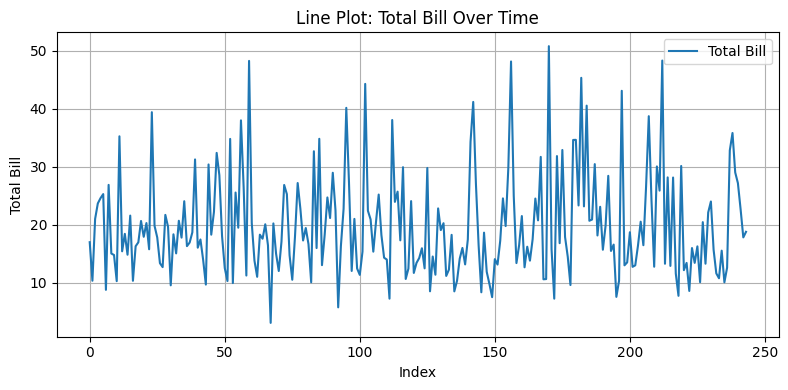

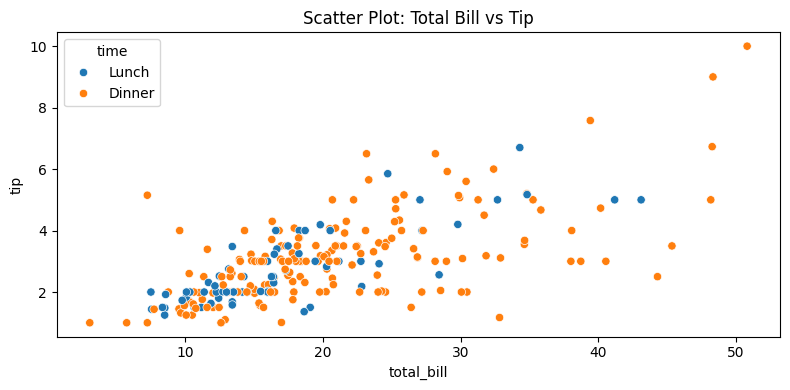

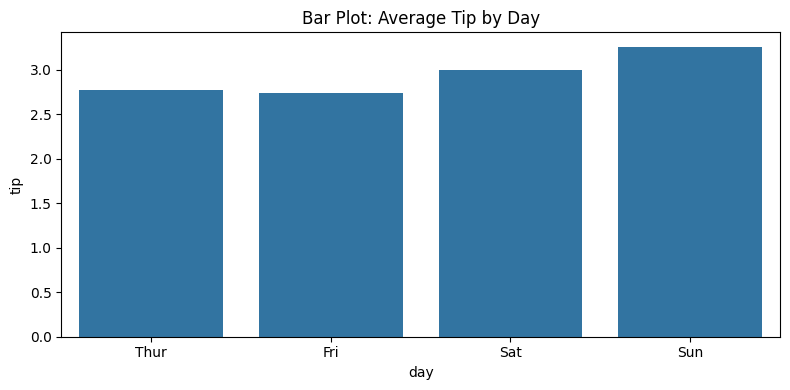

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load built-in dataset
tips = sns.load_dataset("tips")

# Line Plot: Total bill over time (simulated by index)
plt.figure(figsize=(8, 4))
plt.plot(tips.index, tips['total_bill'], label='Total Bill')
plt.title("Line Plot: Total Bill Over Time")
plt.xlabel("Index")
plt.ylabel("Total Bill")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Total bill vs Tip
plt.figure(figsize=(8, 4))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title("Scatter Plot: Total Bill vs Tip")
plt.tight_layout()
plt.show()

# Bar Plot: Average Tip by Day
plt.figure(figsize=(8, 4))
sns.barplot(data=tips, x='day', y='tip', estimator='mean', ci=None)
plt.title("Bar Plot: Average Tip by Day")
plt.tight_layout()
plt.show()